<a href="https://colab.research.google.com/github/Ali-Hasan-Khan28/Natural-Language-Processing/blob/main/LabMid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First I load the csv file.
Then I explored the csv file in form of dataframe.Using describe, info or etc.
Removed Null Values
Drop column Id which i found to be unuseful.
Then I perform to remove email, user name, urls or etc form text of tweets.
Then I remove retweeted one.
Then I remove emojis from dataframe.
Then remove emoji from text.
Then convert all text lower case
Then perform task to remove stop words
Then I performed lemitzation on text and created new colun to collect lemmitize text for each
Then I performed Stemming on each Lemmitize token


Then I’m applying TEXTBLOB for sentiment analysis
Got polarity index and subjectivity for each
And then find out most negative tweets using sorting methods of polarity
Then find out most positive tweets using sorting method of polarity


Then I’m applying vader analysis
In vader analysis it performs analysis on text and give output in from of how data is positive, negative and neutral and also confidence score for each sentence


Then for vectorization I have used TF-IDF vectorization
Giving frequency value for each word in the document and then store in new datafram named tf_idfresult


Also I have applied Doc 2 vev for vectorization to match each vector in fixed dimensional space

Did not applied ML models and machine learning Azure due to short limited recourses and time


In [1]:
print("asadaedd")

asadaedd


In [3]:
import pandas as pd

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Natural Language Processing Lab/vaccination_all_tweets.csv")

In [6]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [8]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [9]:
df.shape


(228207, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [11]:
df.drop(columns=['id'], inplace=True)

In [12]:
df = df.drop_duplicates('text')
print(df.shape)

(226373, 15)


Removing retweets, urls, emails or etc

In [13]:
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

df['text'].transform(clean_tweet_text)
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [14]:
df['date'] = pd.to_datetime(df['date']).dt.date
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [15]:
# pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']]


,text,date,user_name,user_location,hashtags,favorites,retweets
221427,This video fits the last almost 2 years into 2...,2021-11-11,Sputnik V,"Moscow, Russia",['SputnikV'],54017,12294
68358,"RDIF, Laboratorios Richmond launched productio...",2021-04-20,Sputnik V,"Moscow, Russia",['SputnikV'],25724,11288
46053,Why we need Two Doses of mRNA Vaccine 💉 #vacci...,2021-04-01,hotvickkrishna,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",19622,7695
54674,We completely reject the false and malicious r...,2021-04-08,BharatBiotech,"Hyderabad, India",NaN,15944,6018
66822,ICMR study shows #COVAXIN neutralises against ...,2021-04-21,ICMR,New Delhi,['COVAXIN'],11995,4851
...,...,...,...,...,...,...,...
91956,@Xukki2 @Snack800 OCGN 💎🙌🏻 #BharatBiotech \n#O...,2021-06-08,SPARTONY,"Michigan, USA","['BharatBiotech', 'OCGN', 'Ocugen', 'COVAXIN']",0,0
91957,What's your current #Vaccination Status ?\n\n#...,2021-06-08,BiggDeals,Everywhere,"['Vaccination', 'VaccinateIndia', 'vaccine', '...",0,0
91958,I am not even allowed to login on #CowinPortal...,2021-06-08,Neeraj Shinde,Pune,['CowinPortal'],2,0
91959,@Brians_Trades OCGN 💎🙌🏻 #BharatBiotech \n#OCGN...,2021-06-08,SPARTONY,"Michigan, USA","['BharatBiotech', 'OCGN', 'Ocugen', 'COVAXIN']",0,0


In [16]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)


,text,date,user_name,user_location,hashtags,favorites,retweets
3,"Facts are immutable, Senator, even when you're...",2020-12-12,Charles Adler,"Vancouver, BC - Canada",NaN,2129,446
13,For all the women and healthcare providers who...,2020-12-12,Dr.Krutika Kuppalli,NaN,['PfizerBioNTech'],82,48
35,An immigrant Muslim couple find the COVID-19 V...,2020-12-12,Shahjhan Malik | #WearAMask,"Nottinghamshire, England","['CovidVaccine', 'PfizerBioNTech', 'Pfizervacc...",37,2
295,New PODCAST: Vaccinating Our Way Out of the Pa...,2020-12-12,World Affairs,"San Francisco, CA",NaN,34,10
296,Eric Shawn: The vaccine is here...in record ti...,2020-12-12,Marc Siegel MD,NaN,NaN,32,8
7,There have not been many bright days in 2020 b...,2020-12-12,Dr.Krutika Kuppalli,NaN,"['BidenHarris', 'Election2020']",22,2
293,#UnitedStates : The Federal Aviation Administr...,2020-12-12,DD News,"New Delhi, India",['UnitedStates'],21,4
12,The agency also released new information for h...,2020-12-12,WION,India,NaN,18,0
25,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgo...,2020-12-12,Devan Surendran,"Nottingham, England","['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']",10,1
17,"Coronavirus: Iran reports 8,201 new cases, 221...",2020-12-12,ILKHA,Türkiye,"['Iran', 'coronavirus', 'PfizerBioNTech']",5,3


Removing Emoji


In [17]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [18]:
pip install emoji

In [19]:
import emoji

In [20]:
df['user_name']

0                   Rachel Roh
1                  Albert Fong
2                     eli🇱🇹🇪🇺👌
3                Charles Adler
4         Citizen News Channel
                  ...         
228202                  VaxBLR
228203                  VaxBLR
228204                  VaxBLR
228205        Gatti Valentino🐾
228206                  VaxBLR
Name: user_name, Length: 226373, dtype: object

i did till 440 rows because it was giving some unkonwn error after solving it

In [21]:

for i in range(4400):
  print(i)
  if i == 2790 or i == 2997 or i==4116 or i == 4360:
    df['user_name'][i] = 'Ali HAasan'
    continue
  df ['user_name'] = emoji.demojize(df['user_name'][i], delimiters=("", ""))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Tokenization

In [22]:

for i in range(4400):
  print(i)
  if i == 2790 or i == 2997 or i==4116 or i == 4360:
    df['user_name'][i] = 'Ali HAasan'
    continue
  df ['text'] = emoji.demojize(df['text'][i], delimiters=("", ""))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
df['text'] = df['text'].str.lower()


In [24]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,Rachel Roh,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,same folks said daikon paste could treat a cyt...,NaN,Twitter Web App,1,1,False
2,Rachel Roh,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,same folks said daikon paste could treat a cyt...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,Rachel Roh,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,same folks said daikon paste could treat a cyt...,NaN,Twitter Web App,446,2129,False
4,Rachel Roh,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,same folks said daikon paste could treat a cyt...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,Rachel Roh,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,same folks said daikon paste could treat a cyt...,['SputnikV'],Twitter for Android,0,0,False


In [25]:
pip install pandas nltk

In [26]:
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize

# Download the necessary resource
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
import nltk.data

# Loading PunktSentenceTokenizer using English pickle file
tokenizer = nltk.data.load('tokenizers/punkt/PY3/english.pickle')

removing Stop words

In [28]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [29]:
for i in range(4400):
  print(i)
  if i == 2790 or i == 2997 or i==4116 or i == 4360:
    df['text'][i] = df['text'][i-1]
    continue
  text  =  df['text'][i]
  # Process the text using spaCy
  doc = nlp(text)

  # Remove stopwords
  filtered_words = [token.text for token in doc if not token.is_stop]

  # Join the filtered words to form a clean text
  clean_text = ' '.join(filtered_words)
  df['text'][i] = clean_text

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,folks said daikon paste treat cytokine storm #...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,Rachel Roh,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,1,1,False
2,Rachel Roh,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,Rachel Roh,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,446,2129,False
4,Rachel Roh,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,Rachel Roh,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,same folks said daikon paste could treat a cyt...,['SputnikV'],Twitter for Android,0,0,False


In [31]:
df['token'] = 0

In [32]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,token
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,folks said daikon paste treat cytokine storm #...,['PfizerBioNTech'],Twitter for Android,0,0,False,0
1,Rachel Roh,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,1,1,False,0
2,Rachel Roh,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0
3,Rachel Roh,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,446,2129,False,0
4,Rachel Roh,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,0
228203,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,0
228204,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,0
228205,Rachel Roh,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,same folks said daikon paste could treat a cyt...,['SputnikV'],Twitter for Android,0,0,False,0


tokenization

In [33]:
for i in range(4400):
  print(i)
  if i == 2790 or i == 2997 or i==4116 or i == 4360:
    df['token'][i] = df['text'][i-1]
    continue
  text  =  df['text'][i]
  # Process the text using spaCy
  nltk_tokens = nltk.word_tokenize(text)

  df['token'][i] = nltk_tokens

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

performing stemming and lemitization


In [34]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [35]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
for i in range(4400):
  print(i)
  if i == 2790 or i == 2997 or i==4116 or i == 4360:
    df['token'][i] = df['token'][i-1]
    continue
  lis = []
  for j in range(0,len(df['token'][i])):
    text = df['token'][i][j]
    lemmatizer.lemmatize(text)
    lis.append(text)
  df['token'][i] = lis

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Stemming

In [37]:
from nltk.stem import PorterStemmer
# create an object of class PorterStemmer
porter = PorterStemmer()

In [38]:
for i in range(4400):
  print(i)
  if i == 2790 or i == 2997 or i==4116 or i == 4360:
    df['token'][i] = df['token'][i-1]
    continue
  lis = []
  for j in range(0,len(df['token'][i])):
    text = df['token'][i][j]
    porter.stem(text)
    lis.append(text)
  df['token'][i] = lis

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text Blobing

In [39]:
# installs
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly
!pip install wordninja
!pip install pyspellchecker

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [40]:
from textblob import TextBlob

In [41]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [42]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,token,polarity,subjectivity
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,folks said daikon paste treat cytokine storm #...,['PfizerBioNTech'],Twitter for Android,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.0
1,Rachel Roh,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,1,1,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.0
2,Rachel Roh,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.0
3,Rachel Roh,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,446,2129,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.0
4,Rachel Roh,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.0


(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000')])

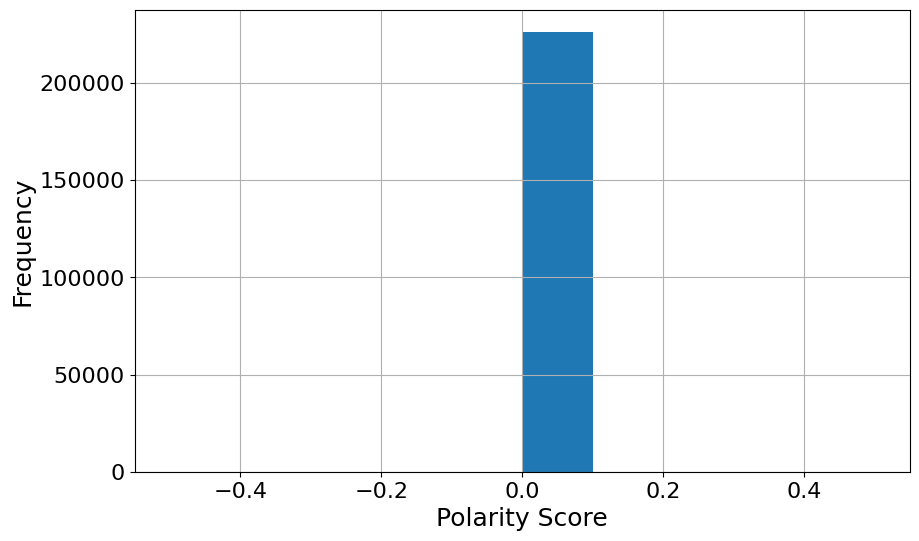

In [43]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000')])

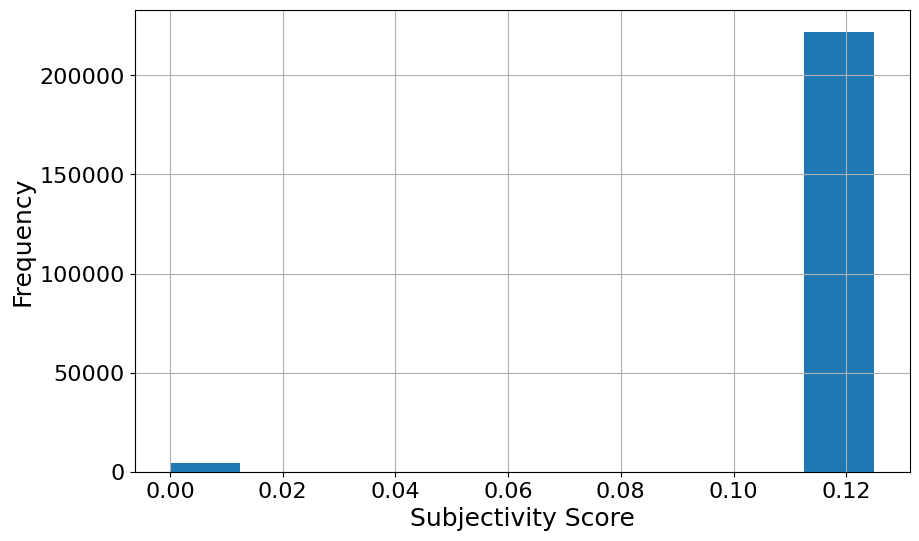

In [44]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Most Negative Charged tweeets

In [45]:
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True)


,text,polarity,subjectivity
0,folks said daikon paste treat cytokine storm #...,0.0,0.000
1,same folks said daikon paste could treat a cyt...,0.0,0.125
2,same folks said daikon paste could treat a cyt...,0.0,0.125
3,same folks said daikon paste could treat a cyt...,0.0,0.125
4,same folks said daikon paste could treat a cyt...,0.0,0.125
...,...,...,...
226368,same folks said daikon paste could treat a cyt...,0.0,0.125
226369,same folks said daikon paste could treat a cyt...,0.0,0.125
226370,same folks said daikon paste could treat a cyt...,0.0,0.125
226371,same folks said daikon paste could treat a cyt...,0.0,0.125


Most postive charged tweets

In [46]:
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True)


,text,polarity,subjectivity
0,folks said daikon paste treat cytokine storm #...,0.0,0.000
1,same folks said daikon paste could treat a cyt...,0.0,0.125
2,same folks said daikon paste could treat a cyt...,0.0,0.125
3,same folks said daikon paste could treat a cyt...,0.0,0.125
4,same folks said daikon paste could treat a cyt...,0.0,0.125
...,...,...,...
226368,same folks said daikon paste could treat a cyt...,0.0,0.125
226369,same folks said daikon paste could treat a cyt...,0.0,0.125
226370,same folks said daikon paste could treat a cyt...,0.0,0.125
226371,same folks said daikon paste could treat a cyt...,0.0,0.125


Using Vader ANalysis

In [47]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [49]:
df['vaderscore'] = 0

In [50]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,token,polarity,subjectivity,vaderscore
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,folks said daikon paste treat cytokine storm #...,['PfizerBioNTech'],Twitter for Android,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,0
1,Rachel Roh,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,1,1,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,0
2,Rachel Roh,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,0
3,Rachel Roh,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,446,2129,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,0
4,Rachel Roh,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,0,0.0,0.125,0
228203,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,0,0.0,0.125,0
228204,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,0,0.0,0.125,0
228205,Rachel Roh,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,same folks said daikon paste could treat a cyt...,['SputnikV'],Twitter for Android,0,0,False,0,0.0,0.125,0


In [51]:
for i in range(4400):
  print(i)
  if i == 2790 or i == 2997 or i==4116 or i == 4360:
    df['vaderscore'][i] = df['vaderscore'][i-1]
    continue
  #for j in range(0,len(df['token'][i])):
  text = df['text'][i]
  print(text)
  scores = analyzer.polarity_scores(text)
  df['vaderscore'][i] = scores



Streaming output truncated to the last 5000 lines.
1898
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1899
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1900
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1901
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1902
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1903
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1904
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1905
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1906
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1907
folks said daikon paste treat cytokine storm # pfizerbiontech https://t.co/xehhimg1kf
1908
folks said daikon paste treat cyto

In [52]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,token,polarity,subjectivity,vaderscore
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,folks said daikon paste treat cytokine storm #...,['PfizerBioNTech'],Twitter for Android,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
1,Rachel Roh,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,1,1,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
2,Rachel Roh,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
3,Rachel Roh,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,folks said daikon paste treat cytokine storm #...,NaN,Twitter Web App,446,2129,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
4,Rachel Roh,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,folks said daikon paste treat cytokine storm #...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"[folks, said, daikon, paste, treat, cytokine, ...",0.0,0.000,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,0,0.0,0.125,0
228203,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,0,0.0,0.125,0
228204,Rachel Roh,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,same folks said daikon paste could treat a cyt...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,0,0.0,0.125,0
228205,Rachel Roh,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,same folks said daikon paste could treat a cyt...,['SputnikV'],Twitter for Android,0,0,False,0,0.0,0.125,0


Calculating TF-IDF


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidfnot(dataframe):
    # Create a TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the descriptions
    tfidf_matrix = tfidf_vectorizer.fit_transform(dataframe['text'])

    # Get the feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Create a DataFrame to store TF-IDF values
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Concatenate the original DataFrame with the TF-IDF DataFrame
    result_df = pd.concat([dataframe, tfidf_df], axis=1)

    return result_df


In [54]:
resulttfidf  = calculate_tfidfnot(df)

In [55]:
resulttfidf

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,daikon,folks,https,paste,pfizerbiontech,said,same,storm,treat,xehhimg1kf
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405.0,1692.0,3247.0,False,2020-12-20,folks said daikon paste treat cytokine storm #...,...,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.000000,0.301511,0.301511,0.301511
1,Rachel Roh,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834.0,666.0,178.0,False,2020-12-13,folks said daikon paste treat cytokine storm #...,...,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.000000,0.301511,0.301511,0.301511
2,Rachel Roh,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10.0,88.0,155.0,False,2020-12-12,folks said daikon paste treat cytokine storm #...,...,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.000000,0.301511,0.301511,0.301511
3,Rachel Roh,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165.0,3933.0,21853.0,True,2020-12-12,folks said daikon paste treat cytokine storm #...,...,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.000000,0.301511,0.301511,0.301511
4,Rachel Roh,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152.0,580.0,1473.0,False,2020-12-12,folks said daikon paste treat cytokine storm #...,...,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.000000,0.301511,0.301511,0.301511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.276509,0.276509,0.276509,0.276509,0.276509,0.276509,0.281931,0.276509,0.276509,0.276509
224409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.276509,0.276509,0.276509,0.276509,0.276509,0.276509,0.281931,0.276509,0.276509,0.276509
224499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.276509,0.276509,0.276509,0.276509,0.276509,0.276509,0.281931,0.276509,0.276509,0.276509
225230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.276509,0.276509,0.276509,0.276509,0.276509,0.276509,0.281931,0.276509,0.276509,0.276509


In [56]:
from gensim.models.doc2vec import Doc2Vec,\
	TaggedDocument
from nltk.tokenize import word_tokenize


In [57]:

for i in range(4400):
  # define a list of documents.
  data = df['text'][i]

  # preproces the documents, and create TaggedDocuments
  tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()),
                tags=[str(i)]) for i,
        doc in enumerate(data)]

  # train the Doc2vec model
  model = Doc2Vec(vector_size=20,
          min_count=2, epochs=50)
  model.build_vocab(tagged_data)
  model.train(tagged_data,
        total_examples=model.corpus_count,
        epochs=model.epochs)

  # get the document vectors
  document_vectors = [model.infer_vector(
    word_tokenize(doc.lower())) for doc in data]

  # print the document vectors
  for i, doc in enumerate(data):
    print("Document", i+1, ":", doc)
    print("Vector:", document_vectors[i])
    print()


Streaming output truncated to the last 5000 lines.
 -0.01623606  0.02020689 -0.0212591   0.0177978  -0.01354473  0.0211748
 -0.01129489 -0.01982698 -0.0161528  -0.02091798  0.01169109  0.01448071
  0.01058257  0.01557677]

Document 24 :  
Vector: [ 0.02483716 -0.02147535  0.00244853  0.01470251 -0.0209824  -0.01554902
 -0.01113335 -0.00966602 -0.0009422   0.02173368 -0.01240827 -0.01486825
  0.00969014 -0.01008533  0.01233834  0.00714895 -0.0048917  -0.02169471
  0.00608492 -0.01723689]

Document 25 : t
Vector: [ 0.01307838  0.0222467  -0.00397323 -0.00433984  0.02404599 -0.00266555
  0.01345251 -0.01245844  0.0168754  -0.00954132  0.0202041   0.00134003
  0.01508814 -0.001227    0.00391719 -0.00590408 -0.01035585 -0.02166846
  0.01250552  0.01440451]

Document 26 : r
Vector: [-0.01700597 -0.01646661 -0.00296298 -0.00926147  0.0122804  -0.00700385
  0.02491887  0.00947864 -0.02507185  0.0117076  -0.01766579 -0.01286808
 -0.02376806 -0.0073483   0.0177242  -0.02275519  0.01536712  0.006

KeyboardInterrupt: 

This is what I could do in 2 hours
Jazak Allah ma'am.

Hope I get good marks

In [1]:
print(doc)

NameError: name 'doc' is not defined